## Globe tossing experiment

In [40]:
import scipy.stats as stats
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
from cmdstanpy import CmdStanModel

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200



## Non-informative uniform prior

### Prior predictive distribution
We can use stan to simulate possible outputs and parameteres based only on prior information.

In [3]:
with open('globe_prior.stan', 'r') as file:
    print(file.read())

data {
  int N;
}

generated quantities {
  real<lower=0,upper=1>theta=uniform_rng(0,1);
  int<lower=0>S_sim=binomial_rng(N,theta);
}



In [4]:
model_prior=CmdStanModel(stan_file='globe_prior.stan')

INFO:cmdstanpy:compiling stan program, exe file: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpi7c76zhn/tmp1cu7mfmr
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/jerzybaranowski/GitHub/KAIR-ISZ/public_lectures/Data Analytics/Topic 3 - One parameter models/Single parameters models/Globe tossing/globe_prior


In [31]:
R=1000
data={'N':11}
sim_uf=model_prior.sample(data=data,
                          fixed_param=True,
                          iter_sampling=R, 
                          iter_warmup=0, 
                          chains=1, 
                          refresh=R,
                          seed=29042020)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


*Here is the only noticable change other than replacing pystan with cmdstanpy. Number of bins in histogram for discrete variable is instead given by the formula*

```bins=np.linspace(-0.5,data['N']+0.5,data['N']+2)```

*In this way we specify bin edges exactly. In this way, we have exactly the same number of bins (12) but they are now centered at each integer. It is also specified on the dependence to the data variable, so if we increase number of trials, it will change accordingly.*

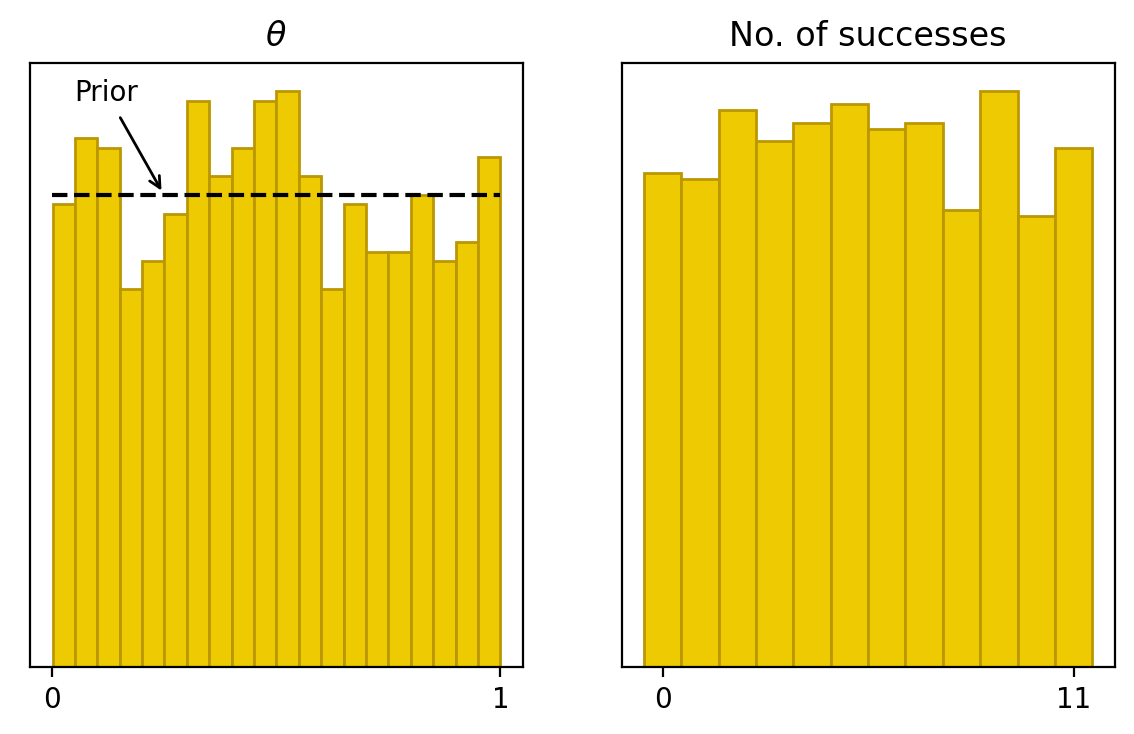

In [41]:
theta=sim_uf.stan_variable('theta')
S_sim=sim_uf.stan_variable('S_sim')

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.uniform.pdf(x),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,1),xytext=(0.05,1.2),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=np.linspace(-0.5,data['N']+0.5,data['N']+2))
ax2.set_xticks([0,11])
ax2.set_yticks([])
ax2.set_title('No. of successes')
plt.show()

### Posterior parameter estimation and posterior predictive distribution

In [10]:
with open('globe_fit.stan', 'r') as file:
    print(file.read())

data {
  int S; //number of successes
  int N; //number of trials
}

parameters {
  real <lower=0,upper=1> theta;
}

model {
  theta ~ beta(1,1);//uniform prior
  S ~ binomial(N,theta);
}
generated quantities {
  int S_sim=0;
  S_sim = binomial_rng(N,theta);
}



In [11]:
model=CmdStanModel(stan_file='globe_fit.stan')

INFO:cmdstanpy:compiling stan program, exe file: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmptp8yc0_4/tmpb93twbuz
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/jerzybaranowski/GitHub/KAIR-ISZ/public_lectures/Data Analytics/Topic 3 - One parameter models/Single parameters models/Globe tossing/globe_fit


In [16]:
data = dict(S = 7,
            N = 11)
fit = model.sample(data=data, seed=26042020)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


In [17]:
fit.diagnose()

INFO:cmdstanpy:Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-1-h5n88700.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-2-ebjgb35r.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-3-i_6qnrwe.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-4-9iin7q_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-1-h5n88700.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-2-ebjgb35r.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-3-i_6qnrwe.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241608-4-9iin7q_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [18]:
theta=fit.stan_variable('theta')
S_sim=fit.stan_variable('S_sim')

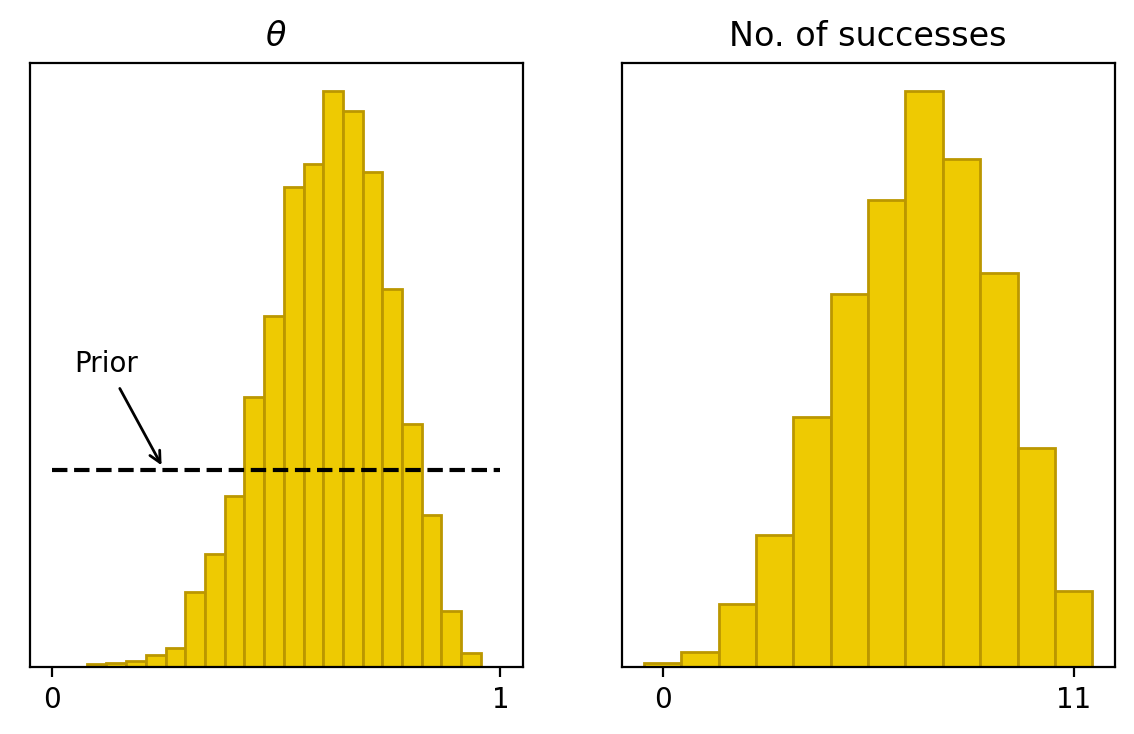

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.uniform.pdf(x),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,1),xytext=(0.05,1.5),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=np.linspace(-0.5,data['N']+0.5,data['N']+2))
ax2.set_xticks([0,11])
ax2.set_yticks([])
ax2.set_title('No. of successes')
plt.show()

In [20]:
np.median(theta)

0.6216740000000001

In [21]:
# function hpd in arviz was replaced during last year by hdi
az.hdi(theta,0.94)

array([0.3704  , 0.860732])

## Normal prior
### Prior predictive distribution

In [22]:
with open('globe_prior_normal.stan', 'r') as file:
    print(file.read())


data {
  int N;
}

generated quantities {
  real<lower=0,upper=1>theta=fabs(fmin(1,normal_rng(0.5,0.15)));
  int<lower=0>S_sim=binomial_rng(N,theta);
}



In [23]:
model_prior_normal=CmdStanModel(stan_file='globe_prior_normal.stan')

INFO:cmdstanpy:compiling stan program, exe file: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmp1c8csgt7/tmpxuvogodk
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/jerzybaranowski/GitHub/KAIR-ISZ/public_lectures/Data Analytics/Topic 3 - One parameter models/Single parameters models/Globe tossing/globe_prior_normal


In [24]:
R=1000
sim_nm=model_prior_normal.sample(data={'N':11},
                          fixed_param=True,
                          iter_sampling=R, 
                          iter_warmup=0, 
                          chains=1, 
                          refresh=R,
                          seed=29042020)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


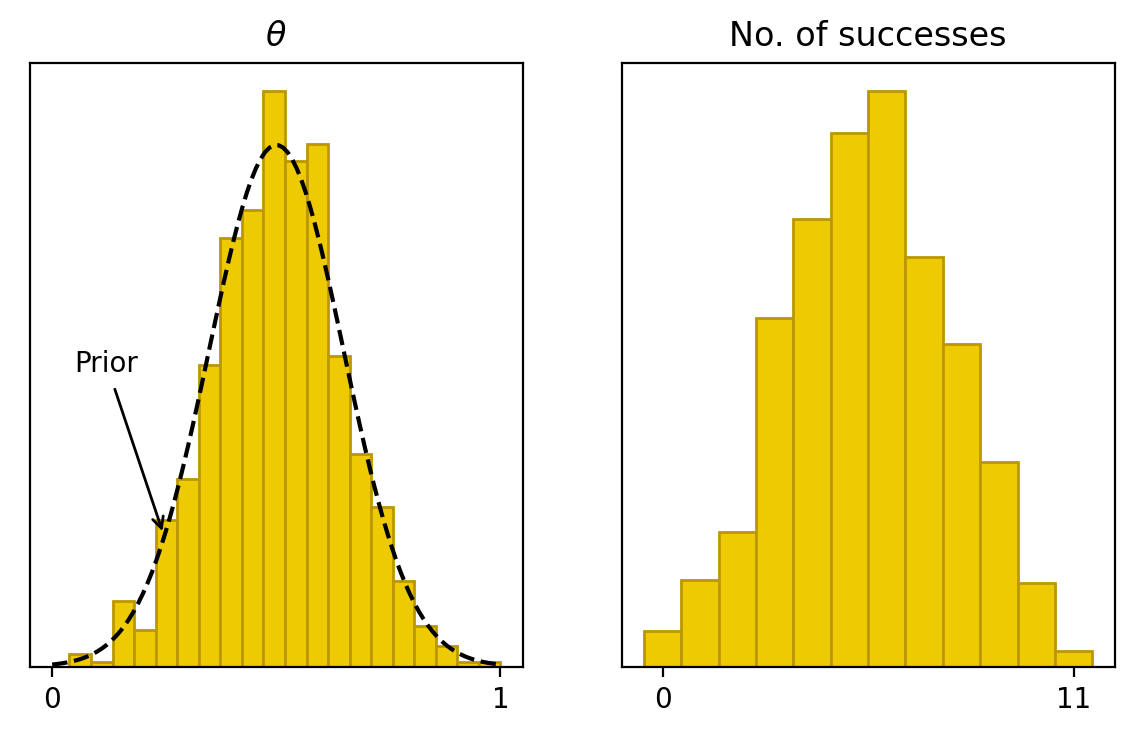

In [25]:
theta=sim_nm.stan_variable('theta')
S_sim=sim_nm.stan_variable('S_sim')
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.norm.pdf(x,0.5,0.15),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,stats.norm.pdf(0.25,0.5,0.15)),xytext=(0.05,1.5),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=np.linspace(-0.5,data['N']+0.5,data['N']+2))
ax2.set_yticks([])
ax2.set_xticks([0,11])
ax2.set_title('No. of successes')
plt.show()

### Posterior parameter estimation and posterior predictive distribution

In [26]:
with open('globe_fit_normal.stan', 'r') as file:
    print(file.read())

data {
  int S; //number of successes
  int N; //number of trials
}

parameters {
  real <lower=0,upper=1> theta;
}

model {
  theta ~ normal(0.5,0.15);
  S ~ binomial(N,theta);
}
generated quantities {
  int S_sim=0;
  S_sim = binomial_rng(N,theta);
}



In [27]:
model_normal=CmdStanModel(stan_file='globe_fit_normal.stan')

INFO:cmdstanpy:compiling stan program, exe file: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmp55r9ho98/tmp8sz_h2k7
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /Users/jerzybaranowski/GitHub/KAIR-ISZ/public_lectures/Data Analytics/Topic 3 - One parameter models/Single parameters models/Globe tossing/globe_fit_normal


In [28]:
data = dict(S = 7,
            N = 11)
fit_normal = model.sample(data=data, seed=26042020)
fit_normal.diagnose()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-1-qadx7470.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-2-43_r1svx.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-3-xuuwq27w.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-4-oti0r3m_.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satis

'Processing csv files: /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-1-qadx7470.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-2-43_r1svx.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-3-xuuwq27w.csv, /var/folders/96/_4tl8xsx4tx9rj0ykk82715h0000gn/T/tmpt9p_lxgu/globe_fit-202104241614-4-oti0r3m_.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [29]:
theta=fit_normal.stan_variable('theta')
S_sim=fit_normal.stan_variable('S_sim')

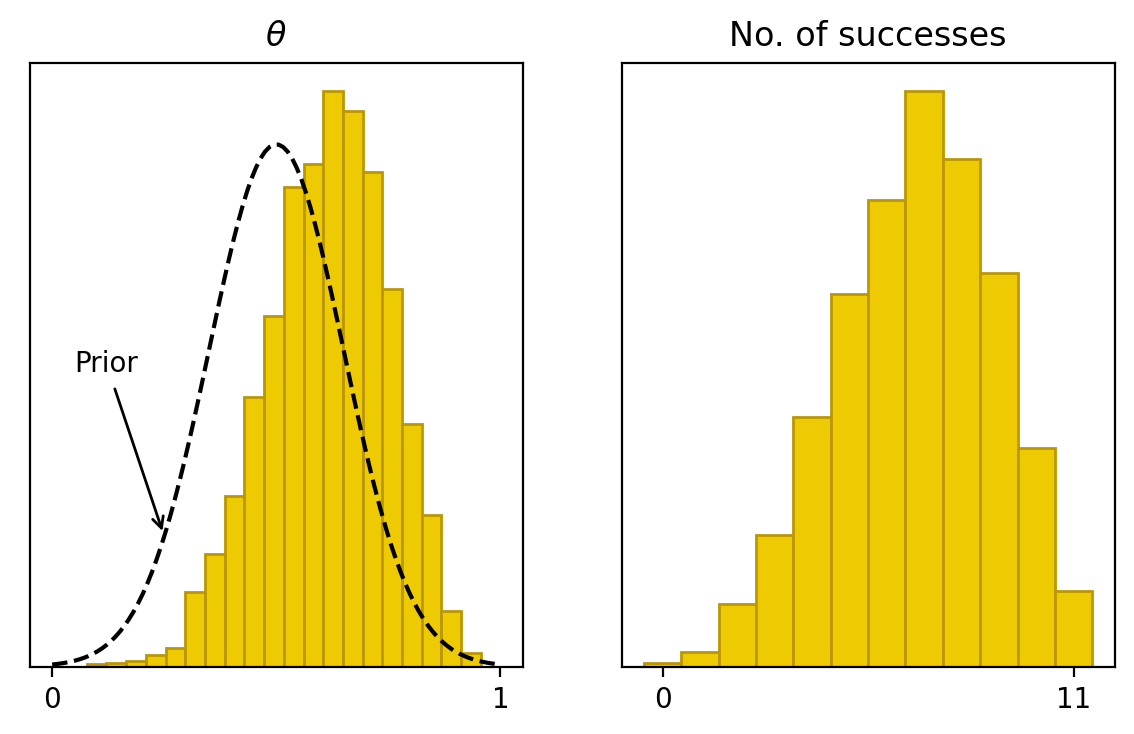

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(theta,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,1,100)
ax1.plot(x,stats.norm.pdf(x,0.5,0.15),color='black',linestyle='--')
ax1.set_xticks([0,1])
ax1.set_yticks([])
ax1.set_title(r'$\theta$')
ax1.annotate('Prior',xy=(0.25,stats.norm.pdf(0.25,0.5,0.15)),xytext=(0.05,1.5),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(S_sim,color=dark,edgecolor=dark_highlight,density=True,bins=np.linspace(-0.5,data['N']+0.5,data['N']+2))
ax2.set_yticks([])
ax2.set_xticks([0,11])
ax2.set_title('No. of successes')
plt.show()

In [42]:
np.median(theta)

0.489599

In [43]:
az.hdi(theta,0.94)

array([0.0520009, 0.989609 ])